In [108]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# For neural networks!
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [47]:
df = pd.read_csv('Heart_Disease_Data.csv', na_values='?')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [48]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [49]:
df.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                4
thal              2
pred_attribute    0
dtype: int64

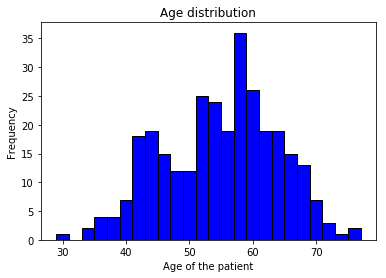

In [50]:
plt.hist(df['age'], color='blue', edgecolor='black', bins=24)
plt.xlabel('Age of the patient')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

In [51]:
men = df['sex'].sum() # '1' indicates male and '0' indicates female
print('There are '+ str(men) + ' males and '+ str(df.shape[0] - men) + ' females in the dataset')

There are 206 males and 97 females in the dataset


In [52]:
df.groupby('cp')['cp'].count()

cp
1     23
2     50
3     86
4    144
Name: cp, dtype: int64

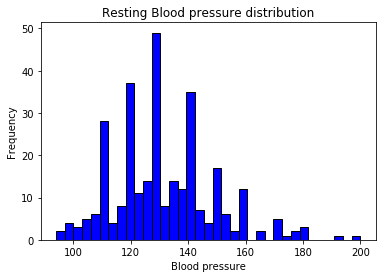

In [53]:
plt.hist(df['trestbps'], color='blue', edgecolor='black', bins=int(106/3))
plt.xlabel('Blood pressure')
plt.ylabel('Frequency')
plt.title('Resting Blood pressure distribution')
plt.show()

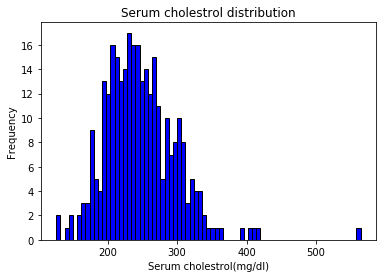

In [54]:
plt.hist(df['chol'], color='blue', edgecolor='black', bins=73)
plt.xlabel('Serum cholestrol(mg/dl)')
plt.ylabel('Frequency')
plt.title('Serum cholestrol distribution')
plt.show()

In [55]:
diabetic = df['fbs'].sum() # '1' indicates yes and '0' indicates no about resting blood sugar
print('There are '+ str(diabetic) + ' patients who had resting blood sugar > 120 mg/dl out of the '+ str(df.shape[0]) + ' patients')

There are 45 patients who had resting blood sugar > 120 mg/dl out of the 303 patients


In [56]:
df.groupby('restecg')['restecg'].count()

restecg
0    151
1      4
2    148
Name: restecg, dtype: int64

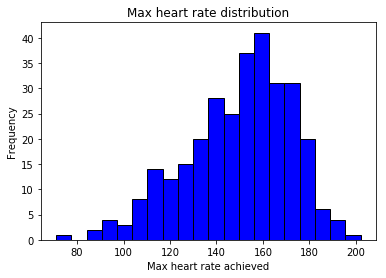

In [57]:
plt.hist(df['thalach'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Max heart rate achieved')
plt.ylabel('Frequency')
plt.title('Max heart rate distribution')
plt.show()

In [58]:
eig = df['exang'].sum() # '1' indicates yes and '0' indicates no about exercise induced angina
print('There are '+ str(eig) + ' patients who had exercise induced angina out of the '+ str(df.shape[0]) + ' patients')

There are 99 patients who had exercise induced angina out of the 303 patients


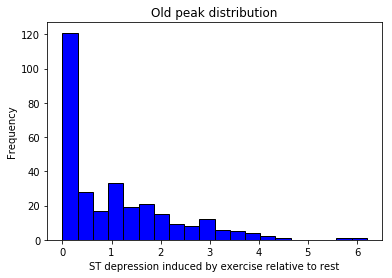

In [59]:
plt.hist(df['oldpeak'], color='blue', edgecolor='black', bins=20)
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Frequency')
plt.title('Old peak distribution')
plt.show()

In [60]:
df.groupby('slop')['slop'].count()

slop
1    142
2    140
3     21
Name: slop, dtype: int64

In [61]:
df.groupby('ca')['ca'].count()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [62]:
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

In [63]:
df.groupby('ca')['ca'].count()

ca
0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [64]:
df.groupby('thal')['thal'].count()

thal
3.0    166
6.0     18
7.0    117
Name: thal, dtype: int64

In [65]:
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [66]:
df.groupby('thal')['thal'].count()

thal
3.0    168
6.0     18
7.0    117
Name: thal, dtype: int64

In [67]:
df.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
dtype: int64

# # ML models

In [68]:
y = df['pred_attribute']
df.drop('pred_attribute', axis=1, inplace=True)
x = df

In [69]:
rstate = 42
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=rstate)

In [70]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial',C=1e-2,max_iter=500,tol=10)
model.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=10, verbose=0, warm_start=False)

In [71]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

56.57894736842105

In [72]:
model = MultinomialNB(alpha=60)
model.fit(x_train,y_train)

MultinomialNB(alpha=60, class_prior=None, fit_prior=True)

In [73]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

56.57894736842105

In [74]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None)

In [75]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

46.05263157894737

In [76]:
model = BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [77]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

51.31578947368421

In [78]:
model = LinearSVC(C=0.25, max_iter=4000, random_state=42)
model.fit(x_train,y_train)

LinearSVC(C=0.25, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=4000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [79]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

57.89473684210527

In [80]:
model = svm.SVC(C=5, random_state=42, tol=0.1)
model.fit(x_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.1,
  verbose=False)

In [81]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

51.31578947368421

In [82]:
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [83]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

52.63157894736842

In [84]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

56.57894736842105

In [86]:
model.feature_importances_

array([0.11429169, 0.03569407, 0.06302442, 0.08439245, 0.11292135,
       0.02340423, 0.03795025, 0.14758517, 0.053465  , 0.10826695,
       0.04083989, 0.09000716, 0.08815737])

In [87]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [88]:
predictions = model.predict(x_test)
accuracy_score(predictions, y_test) * 100

55.26315789473685

## Neural Networks! 

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_y)

x = x.drop(x.columns[[1,5,6,8,10]], axis=1)

In [93]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=8, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=10, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=rstate)

results = cross_val_score(estimator, x, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [99]:
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_y = encoder.transform(y_test)
dummy_y = np_utils.to_categorical(encoded_y)
encoder1 = LabelEncoder()
encoder1.fit(y_train)
encoded_y1 = encoder1.transform(y_train)
dummy_y1 = np_utils.to_categorical(encoded_y1)

In [101]:
#x_test = x_test.drop(x_test.columns[[1,5,6,8,10]], axis=1)
x_train = x_train.drop(x_train.columns[[1,5,6,8,10]], axis=1)

In [102]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=10, verbose=0)

In [103]:
estimator.model = load_model('model.h5')

In [104]:
estimator.fit(x_train,y_train)

In [105]:
predictions = estimator.predict(x_test)

In [106]:
accuracy_score(predictions,y_test)*100

52.63157894736842

In [318]:
model = XGBClassifier(n_jobs=5,learning_rate=0.005,s)
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.005, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=5, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1.2, seed=None,
       silent=True, subsample=1)

In [319]:
predictions = model.predict(x_test)

/home/pratik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [320]:
accuracy_score(predictions,y_test)*100

52.63157894736842